In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('Global_Space_Exploration_Dataset.csv')

In [70]:
df.head(20)

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277
5,USA,2011,Down-sized holistic methodology,Unmanned,North Kevin,Research,22.76,85,Nuclear Propulsion,Low,France,166
6,Germany,2011,Adaptive coherent definition,Manned,Wilsonburgh,Spy,9.33,81,Solar Propulsion,High,"Japan, Russia, India",203
7,India,2012,Innovative 6thgeneration algorithm,Unmanned,South William,Weather,6.62,69,Solar Propulsion,Low,"India, UK, China",25
8,Israel,2024,Business-focused exuding contingency,Manned,Edwardstad,Navigation,13.25,60,Solar Propulsion,Low,"France, China",341
9,Israel,2011,Cross-group incremental function,Unmanned,Port Carla,Communication,23.76,66,Reusable Rocket,High,Japan,107


In [71]:
df.shape

(3000, 12)

In [72]:
df.isna().sum()

Country                    0
Year                       0
Mission Name               0
Mission Type               0
Launch Site                0
Satellite Type             0
Budget (in Billion $)      0
Success Rate (%)           0
Technology Used            0
Environmental Impact       0
Collaborating Countries    0
Duration (in Days)         0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df['Collaborating Countries'] = df['Collaborating Countries'].str.split(', ')

In [75]:
df = df.explode('Collaborating Countries')

In [76]:
df = df.rename(columns={'Country': 'Main Country', 'Collaborating Countries': 'Collaborating Country'})

In [77]:
df.head(10)

,Main Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Israel,236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,China,238
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,Israel,238
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,USA,238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,Israel,277


In [78]:
df['Mission Name'].drop_duplicates()
print("There are 3000 rows and 3000 individual mission names wih drop duplicates.\n"
        "Each mission has a unique name so therefore, 'Mission Name' won't be useful in\n"
        "our machine learning project and can be dropped\n"
     )

There are 3000 rows and 3000 individual mission names wih drop duplicates.
Each mission has a unique name so therefore, 'Mission Name' won't be useful in
our machine learning project and can be dropped



In [79]:
df = df.drop('Mission Name', axis=1)

In [80]:
df.head()

,Main Country,Year,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,Israel,236


In [81]:
df['Launch Site'] = df['Launch Site'].str.strip()
df['Launch Site'].drop_duplicates()

0               Sheilatown
1             New Ericfurt
2         Port Kaitlynstad
3                Mariastad
4       North Jasonborough
               ...        
2994      East Elaineburgh
2995           East Shawna
2996        Douglasborough
2997             Bellhaven
2998            Deniseview
Name: Launch Site, Length: 2702, dtype: object

In [82]:
print(
    "There are 3,000 rows and 2,999 unique mission names after dropping duplicates.\n"
    "All missions except one have a unique launch site, so 'Launch Site' is not useful\n"
    "for our machine learning project and can be dropped."
)

There are 3,000 rows and 2,999 unique mission names after dropping duplicates.
All missions except one have a unique launch site, so 'Launch Site' is not useful
for our machine learning project and can be dropped.


In [83]:
df = df.drop('Launch Site', axis=1)

In [84]:
df.head()

,Main Country,Year,Mission Type,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Country,Duration (in Days)
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,France,112
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,UK,112
0,China,2008,Manned,Communication,16.20,90,Nuclear Propulsion,Medium,Russia,112
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Germany,236
1,Japan,2018,Manned,Communication,29.04,99,Solar Propulsion,High,Israel,236


In [85]:
df_encoded = pd.get_dummies(df, columns=['Main Country', 'Collaborating Country', 'Mission Type','Satellite Type', 'Technology Used', 'Environmental Impact', 'Collaborating Country'])

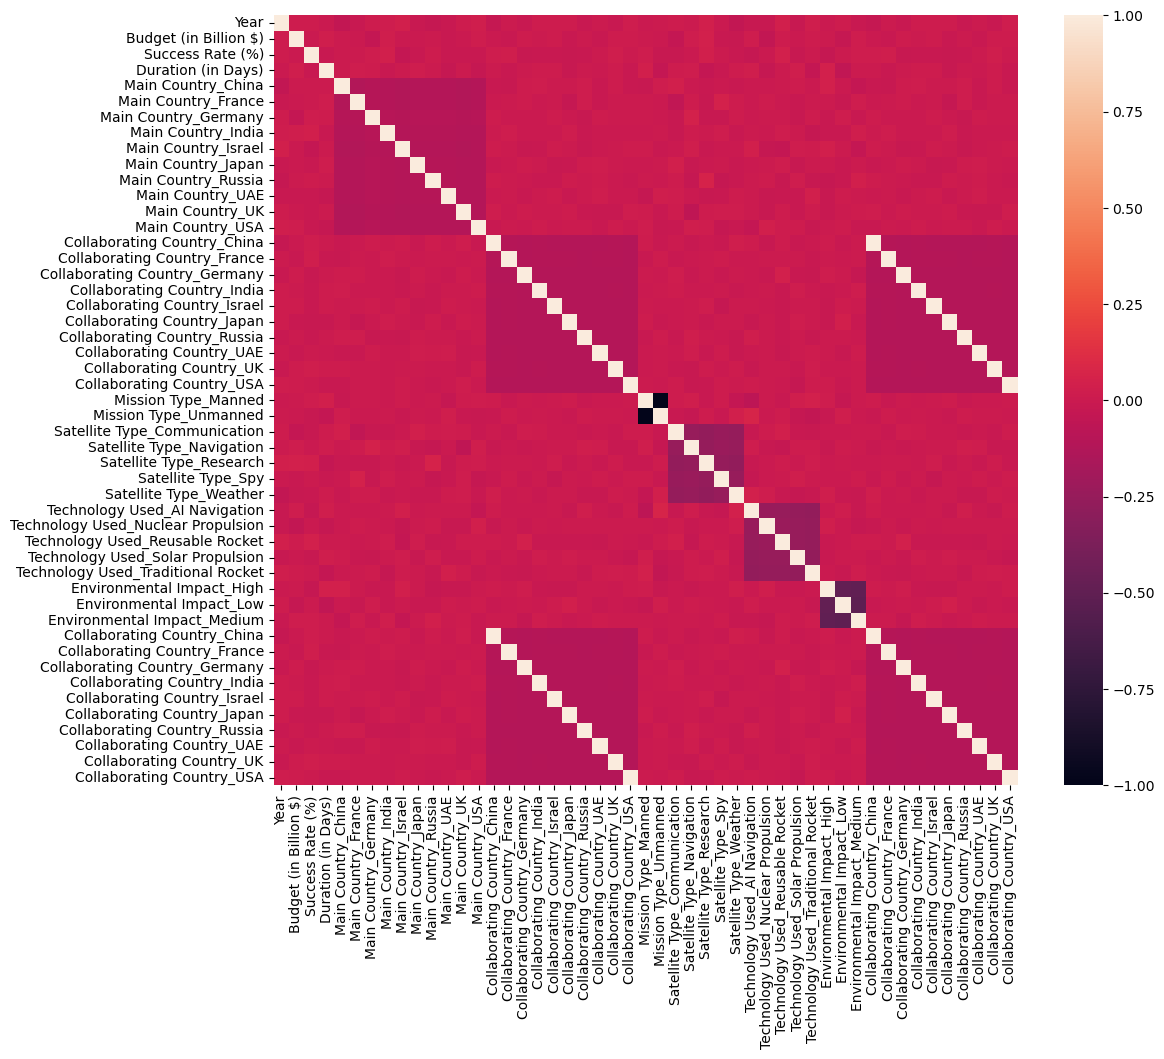

In [93]:
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=False,)
plt.show()